In [4]:
import os
import sys
import json

import matplotlib.pyplot as plt

proj_dir = os.path.dirname(os.path.abspath(os.getcwd()))
print(proj_dir)

if proj_dir not in sys.path:
    sys.path.insert(1, proj_dir)

/home/jec/GIT/code-blocks/textnlp


In [5]:
import gutenberg.load

In [5]:
fns = [os.path.join(default_ascii_dir, x) for x in fbs]

In [6]:
fn = fns[2]
print(fn)

/home/jamescorbin/Desktop/texts/ascii/449.txt


In [7]:
preprocessing.main()

2021-01-10 19:28:56,196 - textnlp.preprocessing - INFO - Input directory file:///home/jamescorbin/Desktop/texts/ascii
2021-01-10 19:28:56,197 - textnlp.preprocessing - INFO - Output directory file:///home/jamescorbin/Desktop/texts/preprocessed
2021-01-10 19:28:56,197 - textnlp.preprocessing - INFO - Ancillary directory file:///home/jamescorbin/Desktop/texts/ancillary


0

In [8]:
fns0 = os.listdir(default_preprocessed_dir)
fns1 = os.listdir(default_ancillary_dir)

_id = "5200"
fn_json = os.path.join(default_ancillary_dir, f"{_id}.json")
fn_text = os.path.join(default_preprocessed_dir, f"{_id}.txt")
print(fn_text, fn_json)

/home/jamescorbin/Desktop/texts/preprocessed/5200.txt /home/jamescorbin/Desktop/texts/ancillary/5200.json


In [9]:
with open(fn_json, 'r') as f:
    counts = json.load(f)

In [10]:
with open(fn_text, 'r') as f:
    text = [x.strip() for x in f.readlines()]

In [11]:
text[:10]

['copyright',
 'c',
 '2002',
 'david',
 'wyllie',
 '.',
 'metamorphosis',
 'franz',
 'kafka',
 'translated']

In [12]:
fig = visualization.plot_wordcloud(counts, fns1[0])

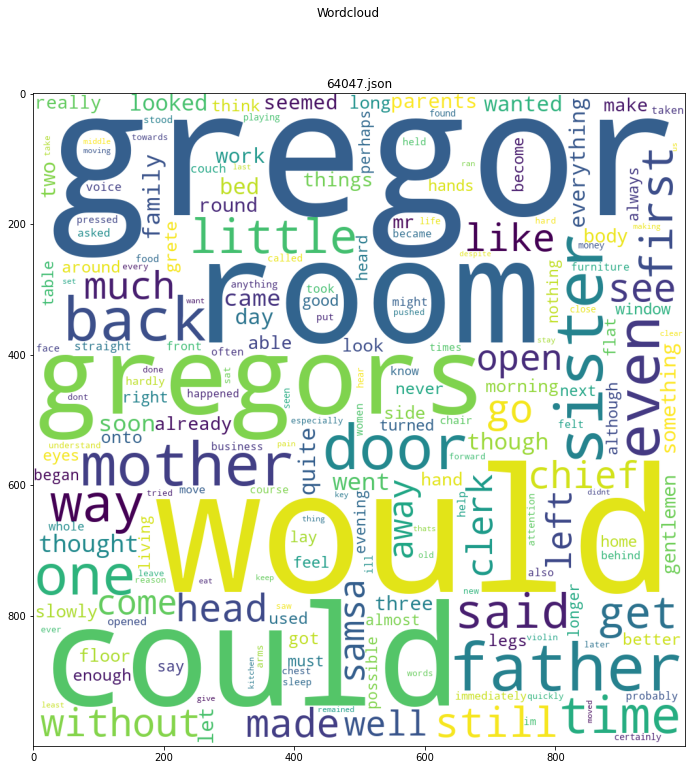

In [13]:
dummy = plt.figure()
new_manager = dummy.canvas.manager
new_manager.canvas.figure = fig
fig.set_canvas(new_manager.canvas)

In [14]:
enc = encoder_ext.LabelEncoderExt(count_thresh=10)
enc.fit(counts, from_counts=True)

0

In [15]:
enc.classes_[:50]

array(['[UNK]', 'able', 'almost', 'already', 'also', 'although', 'always',
       'anything', 'arms', 'around', 'asked', 'attention', 'away', 'back',
       'became', 'become', 'bed', 'began', 'behind', 'better', 'body',
       'business', 'called', 'came', 'certainly', 'chair', 'chest',
       'chief', 'clear', 'clerk', 'close', 'come', 'couch', 'could',
       'course', 'day', 'despite', 'didnt', 'done', 'dont', 'door',
       'doors', 'eat', 'effort', 'enough', 'especially', 'even',
       'evening', 'ever', 'every'], dtype='<U11')

In [16]:
enc_tokens = enc.transform(text)

In [17]:
ord_con = word_cloud.encoded_pairings(enc_tokens)

In [18]:
ord_con[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [19]:
wc = word_cloud.WordCloud(enc.classes_, ord_con)

In [20]:
wc.get_word_relation('effort', 'able')

(2, [[(effort, 43)], [([UNK], 0), (get, 67), (go, 69)], [(able, 1)]])

In [21]:
import textnlp.markov_chain as markov_chain

In [22]:
enc_tokens, enc = markov_chain._encode(text, counts, count_thresh=2)

In [23]:
enc_tokens[:100]

array([   0,    0,    0,  246, 1190,    0,  663,  418,  567, 1083,  246,
       1190,  728,  679,  461,  869, 1173,    0,  291,  415,    0,   82,
        509,    0,    0,  590,    0,  614,   69,  611,  485,  621,  221,
        882,  126,   94,  944,    0,    0,    0,  994,    0,    0,    0,
        482,    3,    0,  884,  818,    0,  673,    0,  652,  602,    0,
       1049,    0,  934,  847,    0,    0,  634,    0, 1159,  478, 1054,
          0, 1142,  290,    0,  852,  792,  517,  852,   27,  621,  947,
        590,  760,  416,  368, 1134,    0,  192,    0,  868,  590,  976,
       1029,  869, 1085,  866,  518,  768,  826,  238,    0,    0,    0,
        707])

In [24]:
X, Y = markov_chain._stack(enc_tokens, ts_len=2)

In [25]:
X[:10], Y[:10]

(array([[1190,    0],
        [   0,    0],
        [   0,    0],
        [   0,    0],
        [   0,  246],
        [ 246, 1190],
        [1190,    0],
        [   0,  663],
        [ 663,  418],
        [ 418,  567]]),
 array([   0,    0,    0,  246, 1190,    0,  663,  418,  567, 1083]))

In [26]:
len(enc.classes_)

1199

In [27]:
T = markov_chain._transition_matrix(X, Y)

In [28]:
T.get((0, 0))

0